## This notebook demonstrates how to use bias mitigation algorithm during "Post-processing stage" from AI 360 fairness toolkit

### Post-processing algorithm
A bias mitigation algorithm that is applied to predicted labels.

### Insert your credentials as credentials in the below cell
Click on dropdown from Pipeline_LabelEncoder-0.1.zip under Data tab and select 'Credentials'

In [ ]:
!pip install aif360 numpy pandas scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
!ls

justice_cleaned.csv  Pipeline_LabelEncoder-0.1.zip  sample_data


In [ ]:
!pip install Pipeline_LabelEncoder-0.1.zip
!pip install aif360
!pip install fairlearn

Processing ./Pipeline_LabelEncoder-0.1.zip
  Preparing metadata (setup.py) ... done
  Created wheel for Pipeline_LabelEncoder: filename=Pipeline_LabelEncoder-0.1-py3-none-any.whl size=2037 sha256=a4038a3140f1716869576d270c80a7c8bd599f1b1d5fe046b211d46b34687e42
  Stored in directory: /root/.cache/pip/wheels/55/d6/53/39f1d9316b4dc9d291c487b3d7b7538ee66deecd5803b69106
Successfully built Pipeline_LabelEncoder
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.__version__

'2.18.0'

In [ ]:
pip install 'aif360[inFairness]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%matplotlib inline
# Load all necessary packages
import numpy as np
import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discounted

### Insert the data as Pandas Dataframe and change the name from df_data_ to df

In [ ]:
df= pd.read_csv('justice_cleaned.csv')
df.head(10)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,Criminal Procedure
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
5,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment
6,6,50655,Sarno v. Illinois Crime Investigating Commission,https://api.oyez.org/cases/1971/70-7,70-7,1971,Sarno,Illinois Crime Investigating Commission,<p>The Illinois Crime Investigating Commission...,1424,5,2,False,per curiam,reversed/remanded,Criminal Procedure
7,7,50656,Argersinger v. Hamlin,https://api.oyez.org/cases/1971/70-5015,70-5015,1971,Argersinger,Hamlin,<p>Jon Argersinger was an indigent charged wit...,347,9,0,True,majority opinion,reversed,Criminal Procedure
8,8,50657,Eisenstadt v. Baird,https://api.oyez.org/cases/1971/70-17,70-17,1971,Eisenstadt,Baird,<p>William Baird gave away Emko Vaginal Foam t...,420,6,1,False,majority opinion,affirmed,Privacy
9,9,50663,Gooding v. Wilson,https://api.oyez.org/cases/1971/70-26,70-26,1971,Gooding,Wilson,<p>A Georgia state court convicted Johnny Wils...,612,5,2,False,majority opinion,affirmed,First Amendment


In [ ]:
df.describe(include = 'all')

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
count,3303.000000,3303.000000,3303,3303,3292,3303,3303,3303,3303,3303.000000,3303.000000,3303.000000,3303,3303,3303,3303
unique,NaN,NaN,3240,3303,3132,70,2764,2556,3302,NaN,NaN,NaN,2,10,9,14
top,NaN,NaN,Johnson v. United States,https://api.oyez.org/cases/2020/19-1039,6,1997,United States,United States,"<p>In 1952, Arizona invoked the U.S. Supreme C...",NaN,NaN,NaN,True,majority opinion,reversed/remanded,Criminal Procedure
freq,NaN,NaN,5,1,9,97,202,315,2,NaN,NaN,NaN,2155,2836,1145,1001
mean,1651.000000,56336.505298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1112.496821,7.009688,1.727823,NaN,NaN,NaN,NaN
std,953.638296,3600.259018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.514960,1.726244,1.604460,NaN,NaN,NaN,NaN
min,0.000000,50606.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,825.500000,54339.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757.000000,5.000000,0.000000,NaN,NaN,NaN,NaN
50%,1651.000000,55260.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,7.000000,2.000000,NaN,NaN,NaN,NaN
75%,2476.500000,59437.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1381.000000,9.000000,3.000000,NaN,NaN,NaN,NaN


In [ ]:
privileged_groups = [{'issue_area': 1}]
unprivileged_groups = [{'issue_area': 0}]
cost_constraint='weighted'


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['issue_area'] = le.fit_transform(df['issue_area'])


In [ ]:
from sklearn import preprocessing
categorical_column = ['issue_area', 'decision_type', 'disposition']

data_encoded = df.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)


data_encoded.head()

Feature issue_area
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13)}
Feature decision_type
mapping {'dismissal - improvidently granted': np.int64(0), 'dismissal - moot': np.int64(1), 'dismissal - other': np.int64(2), 'dismissal - rule 46': np.int64(3), 'equally divided': np.int64(4), 'majority opinion': np.int64(5), 'memorandum': np.int64(6), 'opinion of the court': np.int64(7), 'per curiam': np.int64(8), 'plurality opinion': np.int64(9)}
Feature disposition
mapping {'affirmed': np.int64(0), 'none': np.int64(1), 'reversed': np.int64(2), 'reversed in-part': np.int64(3), 'reversed in-part/remanded': np.int64(4), 'reversed/remanded': np.int64(5), 'vacated': np.int

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,5,2,2
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,5,5,1
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,5,5,3
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,5,5,1
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,5,8,7


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['issue_area', 'decision_type', 'disposition']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Verify changes
print(df[categorical_columns].head())
print(df.dtypes)  # Check that the columns are now numerical


   issue_area  decision_type  disposition
0           2              5            2
1           1              5            5
2           3              5            5
3           1              5            5
4           7              5            8
Unnamed: 0             int64
ID                     int64
name                  object
href                  object
docket                object
term                  object
first_party           object
second_party          object
facts                 object
facts_len              int64
majority_vote          int64
minority_vote          int64
first_party_winner      bool
decision_type          int64
disposition            int64
issue_area             int64
dtype: object


In [ ]:
!pip install Pipeline_LabelEncoder-0.1.zip

Processing ./Pipeline_LabelEncoder-0.1.zip
  Preparing metadata (setup.py) ... done
  Created wheel for Pipeline_LabelEncoder: filename=Pipeline_LabelEncoder-0.1-py3-none-any.whl size=2037 sha256=c09f3e283768b4718e3b466d6e33fcdb4a3461f9fa516296ee0c97b018cd4a20
  Stored in directory: /root/.cache/pip/wheels/55/d6/53/39f1d9316b4dc9d291c487b3d7b7538ee66deecd5803b69106
Successfully built Pipeline_LabelEncoder
  Attempting uninstall: Pipeline_LabelEncoder
    Found existing installation: Pipeline_LabelEncoder 0.1
    Uninstalling Pipeline_LabelEncoder-0.1:
      Successfully uninstalled Pipeline_LabelEncoder-0.1


In [ ]:
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
preprocessed_data = PipelineLabelEncoder(columns = ['issue_area', 'decision_type', 'disposition']).fit_transform(data_encoded)
print('-------------------------')
#print('validation data encoding')
#validation_enc_data = PipelineLabelEncoder(columns = ['Gender','Married', 'Fraud_risk']).transform(validation_input_data)

Inside fit transform
Feature issue_area
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13)}
Feature decision_type
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9)}
Feature disposition
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8)}
-------------------------

In [ ]:

# Assuming 'case_name' is the column containing case names like "Roe v. Wade"
preprocessed_data = PipelineLabelEncoder(columns = ['issue_area', 'decision_type', 'disposition', 'name','href','docket']).fit_transform(data_encoded)
print('-------------------------')

Inside fit transform
Feature issue_area
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13)}
Feature decision_type
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9)}
Feature disposition
mapping {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8)}
Feature name
mapping {'14

In [ ]:
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original
data_encoded = df.copy()

# Identify categorical columns (excluding numerical ones)
categorical_columns = data_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply PipelineLabelEncoder to encode all categorical columns
preprocessed_data = PipelineLabelEncoder(columns=categorical_columns).fit_transform(data_encoded)

# Convert boolean columns to integers (if any)
boolean_columns = data_encoded.select_dtypes(include=['bool']).columns
preprocessed_data[boolean_columns] = preprocessed_data[boolean_columns].astype(int)

# Verify changes
print(preprocessed_data.info())  # Check data types
print(preprocessed_data.head())  # Preview the transformed data


In [ ]:
preprocessed_data = preprocessed_data.fillna(0)

In [ ]:
print(preprocessed_data['disposition'].unique())

[2 5 8 0 3 4 6 1 7]


In [ ]:
# Define which values are favorable
favorable_labels = {2, 5, 8}  # Adjust based on what you see in print(unique values)
unfavorable_labels = set(preprocessed_data['disposition'].unique()) - favorable_labels

# Convert to binary
preprocessed_data['disposition_binary'] = preprocessed_data['disposition'].apply(lambda x: 1 if x in favorable_labels else 0)


In [ ]:
#Create binary label dataset that can be used by bias mitigation algorithms
justice_dataset = BinaryLabelDataset(favorable_label=1,
                                unfavorable_label=0,
                                df=preprocessed_data,
                                label_names=['disposition_binary'],
                                protected_attribute_names=['issue_area', 'decision_type'],
                                unprivileged_protected_attributes=unprivileged_groups)

In [ ]:
dataset_orig_train, dataset_orig_vt = justice_dataset.split([0.6], shuffle=True)
dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True)

### Training data characteristics

In [ ]:
# print out some labels, names, etc.
display(Markdown("#### Dataset shape"))
print(dataset_orig_train.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_train.favorable_label, dataset_orig_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_orig_train.privileged_protected_attributes, dataset_orig_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_orig_train.feature_names)

#### Dataset shape

(1981, 16)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['issue_area', 'decision_type']


#### Privileged and unprivileged protected attribute values

[array([13.]), array([9.])] [array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]), array([0., 1., 2., 3., 4., 5., 6., 7., 8.])]


#### Dataset feature names

['Unnamed: 0', 'ID', 'name', 'href', 'docket', 'term', 'first_party', 'second_party', 'facts', 'facts_len', 'majority_vote', 'minority_vote', 'first_party_winner', 'decision_type', 'disposition', 'issue_area']


### Metric for the original datasets (without any classifiers)

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

metric_orig_valid = BinaryLabelDatasetMetric(dataset_orig_valid,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original validation dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_valid.mean_difference())

metric_orig_test = BinaryLabelDatasetMetric(dataset_orig_test,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.058850


#### Original validation dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.066667


#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.117574


### Train classifier (logistic regression on original training data)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

# Placeholder for predicted and transformed datasets
dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)

dataset_new_valid_pred = dataset_orig_valid.copy(deepcopy=True)
dataset_new_test_pred = dataset_orig_test.copy(deepcopy=True)

# Logistic regression classifier and predictions for training data
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)
y_train = dataset_orig_train.labels.ravel()
lmod = LogisticRegression()
lmod.fit(X_train, y_train)

fav_idx = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]
y_train_pred_prob = lmod.predict_proba(X_train)[:,fav_idx]

# Prediction probs for validation and testing data
X_valid = scale_orig.transform(dataset_orig_valid.features)
y_valid_pred_prob = lmod.predict_proba(X_valid)[:,fav_idx]

X_test = scale_orig.transform(dataset_orig_test.features)
y_test_pred_prob = lmod.predict_proba(X_test)[:,fav_idx]

class_thresh = 0.5
dataset_orig_train_pred.scores = y_train_pred_prob.reshape(-1,1)
dataset_orig_valid_pred.scores = y_valid_pred_prob.reshape(-1,1)
dataset_orig_test_pred.scores = y_test_pred_prob.reshape(-1,1)

y_train_pred = np.zeros_like(dataset_orig_train_pred.labels)
y_train_pred[y_train_pred_prob >= class_thresh] = dataset_orig_train_pred.favorable_label
y_train_pred[~(y_train_pred_prob >= class_thresh)] = dataset_orig_train_pred.unfavorable_label
dataset_orig_train_pred.labels = y_train_pred

y_valid_pred = np.zeros_like(dataset_orig_valid_pred.labels)
y_valid_pred[y_valid_pred_prob >= class_thresh] = dataset_orig_valid_pred.favorable_label
y_valid_pred[~(y_valid_pred_prob >= class_thresh)] = dataset_orig_valid_pred.unfavorable_label
dataset_orig_valid_pred.labels = y_valid_pred

y_test_pred = np.zeros_like(dataset_orig_test_pred.labels)
y_test_pred[y_test_pred_prob >= class_thresh] = dataset_orig_test_pred.favorable_label
y_test_pred[~(y_test_pred_prob >= class_thresh)] = dataset_orig_test_pred.unfavorable_label
dataset_orig_test_pred.labels = y_test_pred

### Results before post-processing

In [ ]:
cm_pred_train = ClassificationMetric(dataset_orig_train, dataset_orig_train_pred,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original-Predicted training dataset"))
print("Difference in GFPR between unprivileged and privileged groups")
print(cm_pred_train.difference(cm_pred_train.generalized_false_positive_rate))
print("Difference in GFNR between unprivileged and privileged groups")
print(cm_pred_train.difference(cm_pred_train.generalized_false_negative_rate))

cm_pred_valid = ClassificationMetric(dataset_orig_valid, dataset_orig_valid_pred,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original-Predicted validation dataset"))
print("Difference in GFPR between unprivileged and privileged groups")
print(cm_pred_valid.difference(cm_pred_valid.generalized_false_positive_rate))
print("Difference in GFNR between unprivileged and privileged groups")
print(cm_pred_valid.difference(cm_pred_valid.generalized_false_negative_rate))

cm_pred_test = ClassificationMetric(dataset_orig_test, dataset_orig_test_pred,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original-Predicted testing dataset"))
print("Difference in GFPR between unprivileged and privileged groups")
print(cm_pred_test.difference(cm_pred_test.generalized_false_positive_rate))
print("Difference in GFNR between unprivileged and privileged groups")
print(cm_pred_test.difference(cm_pred_test.generalized_false_negative_rate))

#### Original-Predicted training dataset

Difference in GFPR between unprivileged and privileged groups
-0.07816887374557949
Difference in GFNR between unprivileged and privileged groups
-0.021774306303643923


#### Original-Predicted validation dataset

Difference in GFPR between unprivileged and privileged groups
0.6326782617242838
Difference in GFNR between unprivileged and privileged groups
-0.020149888527707622


#### Original-Predicted testing dataset

Difference in GFPR between unprivileged and privileged groups
-0.0972344796323696
Difference in GFNR between unprivileged and privileged groups
-0.058036374268690266


### Perform odds equalizing post processing on scores

In [ ]:
# Odds equalizing post-processing algorithm
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
from tqdm import tqdm

# Learn parameters to equalize odds and apply to create a new dataset
cpp = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     cost_constraint=cost_constraint,
                                     seed=None)
cpp = cpp.fit(dataset_orig_valid, dataset_orig_valid_pred)

### Transform validation and test data using the post processing algorithm

In [ ]:
dataset_transf_valid_pred = cpp.predict(dataset_orig_valid_pred)
dataset_transf_test_pred = cpp.predict(dataset_orig_test_pred)

### Results after post-processing

In [ ]:
cm_transf_valid = ClassificationMetric(dataset_orig_valid, dataset_transf_valid_pred,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original-Transformed validation dataset"))
print("Difference in GFPR between unprivileged and privileged groups")
print(cm_transf_valid.difference(cm_transf_valid.generalized_false_positive_rate))
print("Difference in GFNR between unprivileged and privileged groups")
print(cm_transf_valid.difference(cm_transf_valid.generalized_false_negative_rate))

cm_transf_test = ClassificationMetric(dataset_orig_test, dataset_transf_test_pred,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Original-Transformed testing dataset"))
print("Difference in GFPR between unprivileged and privileged groups")
print(cm_transf_test.difference(cm_transf_test.generalized_false_positive_rate))
print("Difference in GFNR between unprivileged and privileged groups")
print(cm_transf_test.difference(cm_transf_test.generalized_false_negative_rate))

#### Original-Transformed validation dataset

Difference in GFPR between unprivileged and privileged groups
0.21105546894118554
Difference in GFNR between unprivileged and privileged groups
-0.17350637114810852


#### Original-Transformed testing dataset

Difference in GFPR between unprivileged and privileged groups
-0.4498044374201734
Difference in GFNR between unprivileged and privileged groups
-0.24584412929844757


### Testing: Check if the rates for validation data has gone down after transformation

In [ ]:
print(np.abs(cm_pred_valid.difference(cm_pred_valid.generalized_false_negative_rate)))
print(np.abs(cm_transf_valid.difference(cm_transf_valid.generalized_false_negative_rate)))

0.020149888527707622
0.17350637114810852


In [ ]:
# Thresholds
all_thresh = np.linspace(0.01, 0.99, 25)
display(Markdown("#### Classification thresholds used for validation and parameter selection"))

bef_avg_odds_diff_test = []
bef_avg_odds_diff_valid = []
aft_avg_odds_diff_test = []
aft_avg_odds_diff_valid = []
bef_bal_acc_valid = []
bef_bal_acc_test = []
aft_bal_acc_valid = []
aft_bal_acc_test = []
for thresh in tqdm(all_thresh):

    dataset_orig_valid_pred_thresh = dataset_orig_valid_pred.copy(deepcopy=True)
    dataset_orig_test_pred_thresh = dataset_orig_test_pred.copy(deepcopy=True)
    dataset_transf_valid_pred_thresh = dataset_transf_valid_pred.copy(deepcopy=True)
    dataset_transf_test_pred_thresh = dataset_transf_test_pred.copy(deepcopy=True)

    # Labels for the datasets from scores
    y_temp = np.zeros_like(dataset_orig_valid_pred_thresh.labels)
    y_temp[dataset_orig_valid_pred_thresh.scores >= thresh] = dataset_orig_valid_pred_thresh.favorable_label
    y_temp[~(dataset_orig_valid_pred_thresh.scores >= thresh)] = dataset_orig_valid_pred_thresh.unfavorable_label
    dataset_orig_valid_pred_thresh.labels = y_temp

    y_temp = np.zeros_like(dataset_orig_test_pred_thresh.labels)
    y_temp[dataset_orig_test_pred_thresh.scores >= thresh] = dataset_orig_test_pred_thresh.favorable_label
    y_temp[~(dataset_orig_test_pred_thresh.scores >= thresh)] = dataset_orig_test_pred_thresh.unfavorable_label
    dataset_orig_test_pred_thresh.labels = y_temp

    y_temp = np.zeros_like(dataset_transf_valid_pred_thresh.labels)
    y_temp[dataset_transf_valid_pred_thresh.scores >= thresh] = dataset_transf_valid_pred_thresh.favorable_label
    y_temp[~(dataset_transf_valid_pred_thresh.scores >= thresh)] = dataset_transf_valid_pred_thresh.unfavorable_label
    dataset_transf_valid_pred_thresh.labels = y_temp

    y_temp = np.zeros_like(dataset_transf_test_pred_thresh.labels)
    y_temp[dataset_transf_test_pred_thresh.scores >= thresh] = dataset_transf_test_pred_thresh.favorable_label
    y_temp[~(dataset_transf_test_pred_thresh.scores >= thresh)] = dataset_transf_test_pred_thresh.unfavorable_label
    dataset_transf_test_pred_thresh.labels = y_temp

    # Metrics for original validation data
    classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                                 dataset_orig_valid_pred_thresh,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    bef_avg_odds_diff_valid.append(classified_metric_orig_valid.equal_opportunity_difference())

    bef_bal_acc_valid.append(0.5*(classified_metric_orig_valid.true_positive_rate()+
                              classified_metric_orig_valid.true_negative_rate()))

    classified_metric_orig_test = ClassificationMetric(dataset_orig_test,
                                                 dataset_orig_test_pred_thresh,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    bef_avg_odds_diff_test.append(classified_metric_orig_test.equal_opportunity_difference())
    bef_bal_acc_test.append(0.5*(classified_metric_orig_test.true_positive_rate()+
                              classified_metric_orig_test.true_negative_rate()))

    # Metrics for transf validing data
    classified_metric_transf_valid = ClassificationMetric(
                                     dataset_orig_valid,
                                     dataset_transf_valid_pred_thresh,
                                     unprivileged_groups=unprivileged_groups,
                                     privileged_groups=privileged_groups)
    aft_avg_odds_diff_valid.append(classified_metric_transf_valid.equal_opportunity_difference())
    aft_bal_acc_valid.append(0.5*(classified_metric_transf_valid.true_positive_rate()+
                              classified_metric_transf_valid.true_negative_rate()))

    # Metrics for transf validation data
    classified_metric_transf_test = ClassificationMetric(dataset_orig_test,
                                                 dataset_transf_test_pred_thresh,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    aft_avg_odds_diff_test.append(classified_metric_transf_test.equal_opportunity_difference())
    aft_bal_acc_test.append(0.5*(classified_metric_transf_test.true_positive_rate()+
                                  classified_metric_transf_test.true_negative_rate()))


#### Classification thresholds used for validation and parameter selection

100%|██████████| 25/25 [00:00<00:00, 59.54it/s]


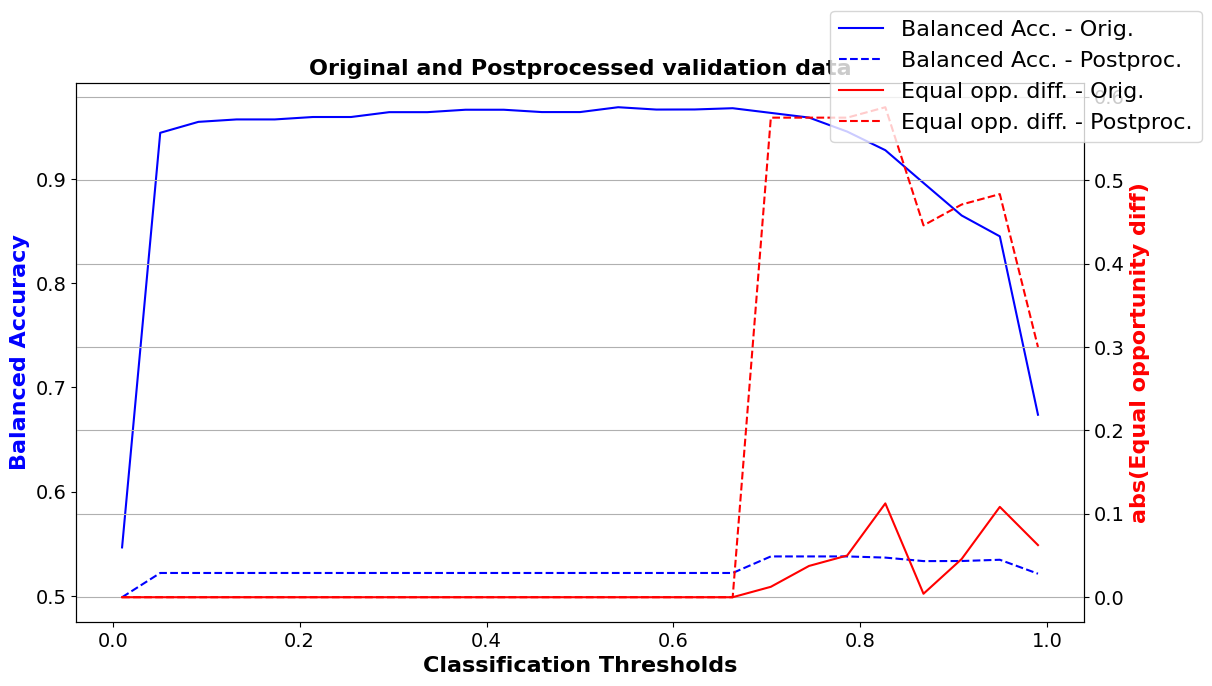

In [ ]:
bef_bal_acc_valid = np.array(bef_bal_acc_valid)
bef_avg_odds_diff_valid = np.array(bef_avg_odds_diff_valid)

aft_bal_acc_valid = np.array(aft_bal_acc_valid)
aft_avg_odds_diff_valid = np.array(aft_avg_odds_diff_valid)

fig, ax1 = plt.subplots(figsize=(13,7))
ax1.plot(all_thresh, bef_bal_acc_valid, color='b')
ax1.plot(all_thresh, aft_bal_acc_valid, color='b', linestyle='dashed')
ax1.set_title('Original and Postprocessed validation data', fontsize=16, fontweight='bold')
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(all_thresh, np.abs(bef_avg_odds_diff_valid), color='r')
ax2.plot(all_thresh, np.abs(aft_avg_odds_diff_valid), color='r', linestyle='dashed')
ax2.set_ylabel('abs(Equal opportunity diff)', color='r', fontsize=16, fontweight='bold')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)
fig.legend(["Balanced Acc. - Orig.", "Balanced Acc. - Postproc.",
             "Equal opp. diff. - Orig.","Equal opp. diff. - Postproc.",],
           fontsize=16)

### We have observed how the predicted labels are modified to eliminate the bias

In [ ]:
print(bef_bal_acc_valid)

[0.54651163 0.94418605 0.95469288 0.95701846 0.95701846 0.95934404
 0.95934404 0.9639952  0.9639952  0.96632078 0.96632078 0.96407863
 0.96407863 0.96872979 0.96648764 0.96657107 0.96777558 0.96329127
 0.95880697 0.94535405 0.92750026 0.89611013 0.86488685 0.84487434
 0.67376682]


In [ ]:
print(aft_bal_acc_valid)

[0.49873814 0.52199395 0.52199395 0.52199395 0.52199395 0.52199395
 0.52199395 0.52199395 0.52199395 0.52199395 0.52199395 0.52199395
 0.52199395 0.52199395 0.52199395 0.52199395 0.52199395 0.53786631
 0.53786631 0.53786631 0.53674523 0.533382   0.53346543 0.53466993
 0.52130045]


In [ ]:
print(bef_avg_odds_diff_valid)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.0125
  0.0375      0.05        0.1125     -0.00416667  0.04583333  0.10833333
  0.0625    ]


In [ ]:
print(aft_avg_odds_diff_valid)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.575
 0.575      0.575      0.5875     0.44583333 0.47083333 0.48333333
 0.3       ]
